In [1]:
#work on this file, all latest updates here
from gym import Env

from gym.spaces import Discrete, Box
import numpy as np
import random
import gym
from gym import spaces

In [2]:
# class BaghchalEnv(gym.Env):
#     metadata = {'render.modes': ['human', 'ascii','rgb_array']}
    
#     def __init__(self):
#         self.board_size = 5
#         self.num_tigers = 4
#         self.num_goats = 20
#         self.goats_captured = 0
#         self.winner = ''
        
#         self.board = np.zeros((self.board_size, self.board_size), dtype=int)
#         self.tigers_positions = []
#         self.goats_positions = []
#         self.turn = -1  # 1: tigers, -1: goats
#         self.done = False
#         self.moves_since_last_capture = 0
#         self.max_moves_without_capture = 50
        
#         self.action_space = spaces.Tuple((spaces.Discrete(self.board_size), spaces.Discrete(self.board_size)))
#         self.observation_space = spaces.Box(low=-1, high=1, shape=(self.board_size, self.board_size), dtype=int)
    
#     def reset(self):
#         #super().reset()
#         self.board = np.zeros((self.board_size, self.board_size), dtype=int)
#         self.tigers_positions = [(0, 0), (0, 4), (4, 0), (4, 4)]
#         self.goats_positions = []
#         self.turn = -1 #goat move
#         self.done = False
#         self.goats_captured = 0
#         self.winner = ''

        
#         for i, j in self.tigers_positions:
#             self.board[i, j] = 1
        
#         self.previous_states = [self.board.copy()]
        
#         return self.board.copy()

#     def baghchal_reward(self, state):
#         """
#         Calculates the reward for a given state of the Baghchal game.
        
#         Parameters:
#         state (numpy.ndarray): The current state of the game.
        
#         Returns:
#         tuple: A tuple (reward_tigers, reward_goats) representing the rewards for the tigers and goats players, respectively.
#         """
#         if self.done:
#             if self.winner == 'T':
#                 return(1,-1)
#             elif self.winner=='G':
#                 return(-1,1)
#             elif self.winner == 'D':
#                 return(0,0)
#         else:
#             return(0,0)
#         # num_tigers = np.sum(state == 1)
#         # num_goats = np.sum(state == -1)
        
#         # if num_tigers < 4:  # if tigers have been captured
#         #     return (-1, 1)
        
#         # if num_goats < 5:  # if goats have captured more than half of the tigers
#         #     return (1, -1)
        
#         # return (0, 0)


    
#     def step(self, action):
#         # if self.done:
#         #         if self.turn == 1:  # Tiger wins
#         #             return self.board.copy(), 10, True, {}
#         #         else:  # Goat wins
#         #             return self.board.copy(), 1, True, {}
                
#         #self.is_game_over()

#         i, j = action
        
#         if self.turn == 1:  # tigers turn
#             if (i, j) in self.tigers_positions:
#                 return self.board.copy(), 0, False, {}
#             if self.board[i, j] != 0:
#                 return self.board.copy(), 0, False, {}
            
#             valid_moves = [(i-1, j), (i+1, j), (i, j-1), (i, j+1)]
#             valid_moves = [(p, q) for p, q in valid_moves if 0 <= p < self.board_size and 0 <= q < self.board_size]
            
#             for p, q in valid_moves:
#                 if self.board[p, q] == -1:
#                     middle_i, middle_j = (i+p)//2, (j+q)//2
#                     if (middle_i, middle_j) in self.tigers_positions:
#                         self.board[i, j] = 1
#                         self.board[middle_i, middle_j] = 0
#                         self.tigers_positions.remove((middle_i, middle_j))
#                         self.tigers_positions.append((i, j))
#                         self.moves_since_last_capture = 0
#                         self.goats_captured += 1
#                         self.turn = -1
#                         break
                        
#             else:  # no goat was eaten
#                 self.board[i, j] = 1
                
#                 for p, q in self.tigers_positions:
#                     if (p, q) != (i, j):
#                         self.board[p, q] = 0
                        
#                 self.tigers_positions = [(i, j)]
#                 self.moves_since_last_capture += 1
#                 self.turn = -1
                
#         else:  # goats turn
#             if len(self.goats_positions) < 20:
#                 if self.board[i, j] != 0:
#                     return self.board.copy(), 0, False, {}
                
#                 self.board[i, j] = -1
#                 self.goats_positions.append((i, j))
#                 self.turn = 1

#             else:
#                 goat_found = False
                
#                 for p, q in [(i-1, j), (i+1, j), (i, j-1), (i, j+1)]:
#                     if 0 <= p < self.board_size and 0 <= q < self.board_size and self.board[p, q] == -1:
#                         if (p, q) not in self.goats_positions:
#                             self.board[p, q] = -1
#                             self.board[i, j] = 0
#                             self.goats_positions.remove((i, j))
#                             self.goats_positions.append((p, q))
#                             goat_found = True
#                             break
                            
#                 if not goat_found:
#                     return self.board.copy(), (0,0), False, {}
                
#                 self.turn = 1
                
#         # Check if the game is over after the move
#         if self.is_game_over():
#             self.previous_states.append(self.board.copy())
#             reward_tigers, reward_goats = self.baghchal_reward(self.board)
#             return self.board.copy(), (reward_tigers, reward_goats), self.done, {}

        
#         # Update the previous states list
#         self.previous_states.append(self.board.copy())
        
#         # Check if the game is a draw due to stalemate
#         if self.moves_since_last_capture >= self.max_moves_without_capture:
#             self.done = True
#             self.winner = 'D'
#             reward_tigers, reward_goats = self.baghchal_reward(self.board)
#             return self.board.copy(), (reward_tigers, reward_goats), self.done, {}
#             #return self.board.copy(),(0,0),self.done,{}
        
#         # Return the board, reward, done flag and an empty dictionary
#         reward_tigers, reward_goats = self.baghchal_reward(self.board)
#         return self.board.copy(), (reward_tigers, reward_goats), self.done, {}
        



#     def _rgb_array(self):
#         """
#         Return a numpy array representing the RGB image of the current state of the game.
#         """
#         board_rgb = np.zeros((self.board_size, self.board_size, 3), dtype=np.uint8)
#         board_rgb[self.board == 1] = np.array([255, 0, 0])  # tigers positions marked with red color
#         board_rgb[self.board == -1] = np.array([255, 255, 255])  # goats positions marked with white color
#         board_rgb = np.rot90(board_rgb)
#         return board_rgb

#     def render(self, mode='human'):
#         if mode == 'human':
#             print(self.board)
#         elif mode == 'ascii':
#             print('  ' + ' '.join(str(i) for i in range(self.board_size)))
#             for i in range(self.board_size):
#                 row = ''.join('.' if self.board[i, j] == 0 else 'T' if (i, j) in self.tigers_positions else 'G' for j in range(self.board_size))
#                 print(i, row)
#         elif mode == 'rgb_array':
#             return self._rgb_array()
#         else:
#             super(BaghchalEnv, self).render(mode=mode)


#     def close(self):
#         pass


#     def is_game_over(self):
#         # if len(self.goats_positions) == 0:
#         #     self.done = True
#         #     return True

#         # Check if tigers have captured 5 goats
#        # if len(self.tigers_positions) == 0 or (self.num_goats - len(self.goats_positions)) >= 5:
#         if (self.goats_captured >= 5):
#             self.done = True
#             self.winner = 'T'
#             return True

#         # Check if goats have blocked tigers from being able to move
#         for i, j in self.tigers_positions:
#             valid_moves = [(i-1, j), (i+1, j), (i, j-1), (i, j+1)]
#             valid_moves = [(p, q) for p, q in valid_moves if 0 <= p < self.board_size and 0 <= q < self.board_size]
#             for p, q in valid_moves:
#                 if self.board[p, q] == 0:
#                     return False
#             self.done = True
#             self.winner = 'G'
#             return True

        


# #The `__init__` method initializes the environment, with the board size, number of tigers, and number of goats. The board is represented as a numpy array of integers, where 0 means empty, 1 means tiger, and -1 means goat. The `turn` variable keeps track of whose turn it is (tigers or goats), and the `done` variable is set to `True` when the game is over.

# #The `reset` method resets the environment to its initial state, with the tigers and goats positioned in their starting positions.

# #The `step` method receives an action (a tuple of integers representing a row and a column), and updates the board state accordingly. If the action is invalid (e.g. trying to move to an occupied cell), no change is made to the board. If it is a valid move, and the tigers can eat a goat, they do so and receive a reward of 1. If a goat reaches the other side of the board, the game is over and the goats win with a reward of 10.

# #The `render` method can display the board in either "human" or "ascii" mode. In "human" mode, it prints the numpy array to the console. In "ascii" mode, it prints a more visually appealing representation of the board.

# #The `close` method is empty, as it is not needed for this environment.

In [1]:
class BaghchalEnv(gym.Env):
    metadata = {'render.modes': ['human', 'ascii','rgb_array']}
    def __init__(self):
        self.board_size = 5
        self.num_tigers = 4
        self.num_goats = 20
        
        self.board = np.zeros((5,5), dtype=int) # initial board state
        self.board[0,0] = self.board[0,4] = self.board[4,0] = self.board[4,4] = 1 # place tigers in corners
        self.phase = "Placement" # initial game phase is Placement
        self.turn = -1 # initial turn is goat's turn
        self.goats_killed = 0 # initial number of goats killed is 0
        self.tigers_captured = 0 # initial number of tigers captured is 0
        self.goat_positions = [] # initial goat positions is empty
        self.tiger_positions = [(0,0), (0,4), (4,0), (4,4)] # initial tiger positions are at corners
        self.empty_positions = [(i,j) for i in range(5) for j in range(5) if self.board[i,j] == 0] # initial empty positions
        self.goats_placed = 0 # initial number of goats placed is 0
        self.winner =''
        self.done = False
        self.moves_since_last_capture = 0
        self.max_moves_without_capture = 50

        self.action_space = spaces.Tuple((spaces.Discrete(self.board_size), spaces.Discrete(self.board_size)))
        self.observation_space = spaces.Box(low=-1, high=1, shape=(self.board_size, self.board_size), dtype=int)
        
    def reset(self):
        self.board = np.zeros((5,5), dtype=int) # reset board state
        self.board[0,0] = self.board[0,4] = self.board[4,0] = self.board[4,4] = 1 # place tigers in corners
        self.phase = "Placement" # reset game phase to Placement
        self.turn = -1 # reset turn to goat's turn
        self.goats_killed = 0 # reset number of goats killed
        self.tigers_captured = 0 # reset number of tigers captured
        self.goat_positions = [] # reset goat positions
        self.tiger_positions = [(0,0), (0,4), (4,0), (4,4)] # reset tiger positions
        self.empty_positions = [(i,j) for i in range(5) for j in range(5) if self.board[i,j] == 0] # reset empty positions
        self.goats_placed = 0 # reset number of goats placed
        self.done = False
        self.winner = ''
        self.previous_states = [self.board.copy()]
        return self.board
    

    def get_valid_moves(self, position):
        valid_moves = []
        i, j = position
        if i > 0 and self.board[i-1, j] == 0:
            valid_moves.append((i-1, j))
        if i < 4 and self.board[i+1, j] == 0:
            valid_moves.append((i+1, j))
        if j > 0 and self.board[i, j-1] == 0:
            valid_moves.append((i, j-1))
        if j < 4 and self.board[i, j+1] == 0:
            valid_moves.append((i, j+1))
        return valid_moves

    def check_tiger_capture(self, position):
        i, j = position
        if (i > 1 and self.board[i-1, j] == 1 and self.board[i-2, j] == -1) or \
        (i < 3 and self.board[i+1, j] == 1 and self.board[i+2, j] == -1) or \
        (j > 1 and self.board[i, j-1] == 1 and self.board[i, j-2] == -1) or \
        (j < 3 and self.board[i, j+1] == 1 and self.board[i, j+2] == -1):
            return True
        return False

    def get_tiger_capture_position(self, position):
        """
        Returns the position of the goat that the tiger can capture.
        If there is no goat that the tiger can capture, returns None.

        Parameters:
            position (tuple): the position of the tiger

        Returns:
            tuple: the position of the goat to be captured or None
        """
        i,j = position
        # check if the given position is a tiger
        if self.board[i,j] != 1:
            return None
        
        # iterate over all possible positions for the goat to be captured
        for capture_position in self.goat_positions:
            if capture_position == position:
                continue # cannot capture self
            # check if the goat is adjacent to the tiger
            if (capture_position[0] == position[0] and abs(capture_position[1] - position[1]) == 2) or \
            (capture_position[1] == position[1] and abs(capture_position[0] - position[0]) == 2):
                # check if there is no goat between the tiger and the goat to be captured
                in_between_position = ((position[0] + capture_position[0]) // 2, (position[1] + capture_position[1]) // 2)
                if self.board[in_between_position] == -1:
                    return capture_position
        
        # no goat to be captured
        return None


    def check_goat_capture(self, position):
        i, j = position
        if ((i > 1 and self.board[i-1, j] == 1 and self.board[i-2, j] == -1) or
            (i < 3 and self.board[i+1, j] == 1 and self.board[i+2, j] == -1) or
            (j > 1 and self.board[i, j-1] == 1 and self.board[i, j-2] == -1) or
            (j < 3 and self.board[i, j+1] == 1 and self.board[i, j+2] == -1)):
            return True
        return False


    def get_goat_capture_position(self, position):
        i, j = position
        if i > 1 and self.board[i-1, j] == 1 and self.board[i-2, j] == -1:
            return (i-1, j)
        elif i < 3 and self.board[i+1, j] == 1 and self.board[i+2, j] == -1:
            return (i+1, j)
        elif j > 1 and self.board[i, j-1] == 1 and self.board[i, j-2] == -1:
            return (i, j-1)
        elif j < 3 and self.board[i, j+1] == 1 and self.board[i, j+2] == -1:
            return (i, j+1)
        else:
            return None


    def check_goat_jump(self):
        return True if self.goats_placed >= 20 else False

    def get_valid_moves_with_goat_jump(self):
        valid_moves = []
        for position in self.goat_positions:
            valid_moves.extend(self.get_valid_moves(position))
        return valid_moves

    def get_valid_moves_without_goat_jump(self):
        valid_moves = []
        for position in self.goat_positions:
            valid_moves.extend(self.get_valid_moves(position))
        valid_moves = list(set(valid_moves))
        invalid_moves = [self.get_goat_capture_position(position) for position in self.goat_positions if self.check_goat_capture(position)]
        invalid_moves = list(filter(lambda x: x is not None, invalid_moves))
        valid_moves = list(set(valid_moves) - set(invalid_moves))
        return valid_moves
    
    def is_valid_move(self, position):
        x, y = position
        
        # Check if the move is within the board
        if x < 0 or x > 4 or y < 0 or y > 4:
            return False
        
        # Check if the move is to an empty space
        if position in self.goat_positions or position in self.tiger_positions:
            return False
        
        return True
    
    def tiger_valid_moves(self, position):
        a, b = position
        
        # Check for goat jump situation
        goat_positions = [pos for pos in self.goat_positions if abs(pos[0]-a) <= 1 and abs(pos[1]-b) <= 1]
        for goat in goat_positions:
            dx = goat[0] - a
            dy = goat[1] - b
            new_tiger_x = a + dx
            new_tiger_y = b + dy
            new_tiger_pos = (new_tiger_x, new_tiger_y)
            if self.is_valid_move(new_tiger_pos):
                return [new_tiger_pos]
        
        # If there is no goat jump situation, check for valid moves in all directions
        moves = []
        for dx, dy in [(-1, 0), (1, 0), (0, -1), (0, 1)]:
            new_tiger_x = a + dx
            new_tiger_y = b + dy
            new_tiger_pos = (new_tiger_x, new_tiger_y)
            if self.is_valid_move(new_tiger_pos):
                moves.append(new_tiger_pos)
        
        return moves


    def baghchal_reward(self, state):
            """
            Calculates the reward for a given state of the Baghchal game.
            
            Parameters:
            state (numpy.ndarray): The current state of the game.
            
            Returns:
            tuple: A tuple (reward_tigers, reward_goats) representing the rewards for the tigers and goats players, respectively.
            """
            if self.done:
                if self.winner == 'T':
                    return(1,-1)
                elif self.winner=='G':
                    return(-1,1)
                elif self.winner == 'D':
                    return(0,0)
            else:
                return(0,0)

    def step(self, action):
        i,j = action
        if self.turn == -1: # goat's turn
            if self.phase == "Placement":
                if self.goats_placed == 20: # change game phase to movement phase
                    self.phase = "Movement"
                if action not in self.empty_positions: # invalid move
                    return self.board, (0,-0.5), False, {} #punish goat for invalid move  with -0.5 reward
                self.board[i,j] = -1 # place goat object
                self.empty_positions.remove(action) # remove empty position
                self.goat_positions.append(action) # add goat position
                self.goats_placed += 1 # increment number of goats placed
                self.turn = 1
            else: # Movement phase
                if action not in self.empty_positions: # invalid move
                    return self.board, (0,-0.5), False, {} #punish goat for invalid move  with -0.5 reward
                for goat in self.goat_positions:
                    a,b = goat
                    if action in self.get_valid_moves(goat): # move goat object
                        self.board[i,j] = -1
                        self.board[a,b] = 0
                        self.goat_positions.remove(goat)
                        self.goat_positions.append(action)
                        if self.check_tiger_capture(action): # check for tiger capture
                            self.tigers_captured += 1
                            self.tiger_positions.remove(self.get_tiger_capture_position(action))
                        self.turn = 1 # change turn to tiger's turn
                        break
                else: # invalid move
                    return self.board, (0,-0.5), False, {} #punish goat for invalid move  with -0.5 reward
        else: # tiger's turn
            if action not in self.empty_positions: # invalid move
                return self.board, (-0.5,0), False, {} #punish tiger for invalid move  with -0.5 reward
            
            #modify code from here
            # if self.check_goat_jump(): # check for goat jump situation
            #     valid_moves = self.get_valid_moves_with_goat_jump()
            # else:
            #     valid_moves = self.get_valid_moves_without_goat_jump()
            # if action not in valid_moves: # invalid move
            #     return self.board, (-0.5,0), False, {} #punish tiger for invalid move  with -0.5 reward
            

            for tiger in self.tiger_positions:
                a,b = tiger
                if action in self.tiger_valid_moves(tiger): #call function here with tiger position and valid moves with goat jump and no goat jump situation
                    self.board[i,j]=1
                    self.board[a,b]=0
                    self.tiger_positions.remove(tiger)
                    self.tiger_positions.append(action)
                    if self.check_goat_capture(action): # check for goat capture
                        capture_position = self.get_goat_capture_position(action)
                        if capture_position in self.goat_positions:
                            self.goats_killed += 1
                            self.goat_positions.remove(capture_position)
                            self.empty_positions.append(capture_position)
                    self.turn = -1 # change turn to goat's turn
                    break
                else: # invalid move
                    return self.board, (-0.5,0), False, {} #punish tiger for invalid move  with -0.5 reward


        # Check if the game is over after the move
        self.is_game_over()
            

        
        # Update the previous states list
        self.previous_states.append(self.board.copy())
        
        # Check if the game is a draw due to stalemate
        if self.moves_since_last_capture >= self.max_moves_without_capture:
            self.done = True
            self.winner = 'D'
       
            #return self.board.copy(),(0,0),self.done,{}
        
        # Return the board, reward, done flag and an empty dictionary
        reward_tigers, reward_goats = self.baghchal_reward(self.board)
        return self.board.copy(), (reward_tigers, reward_goats), self.done, {}

    

    def _rgb_array(self):
        """
        Return a numpy array representing the RGB image of the current state of the game.
        """
        board_rgb = np.zeros((self.board_size, self.board_size, 3), dtype=np.uint8)
        board_rgb[self.board == 1] = np.array([255, 0, 0])  # tigers positions marked with red color
        board_rgb[self.board == -1] = np.array([255, 255, 255])  # goats positions marked with white color
        board_rgb = np.rot90(board_rgb)
        return board_rgb

    def render(self, mode='human'):
        if mode == 'human':
            print(self.board)
        elif mode == 'ascii':
            print('  ' + ' '.join(str(i) for i in range(self.board_size)))
            for i in range(self.board_size):
                row = ''.join('.' if self.board[i, j] == 0 else 'T' if (i, j) in self.tigers_positions else 'G' for j in range(self.board_size))
                print(i, row)
        elif mode == 'rgb_array':
            return self._rgb_array()
        else:
            super(BaghchalEnv, self).render(mode=mode)


    def close(self):
        pass


    def is_game_over(self):
        # if len(self.goats_positions) == 0:
        #     self.done = True
        #     return True

        # Check if tigers have captured 5 goats
       # if len(self.tigers_positions) == 0 or (self.num_goats - len(self.goats_positions)) >= 5:
        if (self.goats_killed >= 5):
            self.done = True
            self.winner = 'T'
            return True

        # Check if goats have blocked tigers from being able to move
        for i, j in self.tiger_positions:
            valid_moves = [(i-1, j), (i+1, j), (i, j-1), (i, j+1)]
            valid_moves = [(p, q) for p, q in valid_moves if 0 <= p < self.board_size and 0 <= q < self.board_size]
            for p, q in valid_moves:
                if self.board[p, q] == 0:
                    return False
            self.done = True
            self.winner = 'G'
            return True





#The `__init__` method initializes the environment, with the board size, number of tigers, and number of goats. The board is represented as a numpy array of integers, where 0 means empty, 1 means tiger, and -1 means goat. The `turn` variable keeps track of whose turn it is (tigers or goats), and the `done` variable is set to `True` when the game is over.

#The `reset` method resets the environment to its initial state, with the tigers and goats positioned in their starting positions.

#The `step` method receives an action (a tuple of integers representing a row and a column), and updates the board state accordingly. If the action is invalid (e.g. trying to move to an occupied cell), no change is made to the board. If it is a valid move, and the tigers can eat a goat, they do so and receive a reward of 1. If a goat reaches the other side of the board, the game is over and the goats win with a reward of 10.

#The `render` method can display the board in either "human" or "ascii" mode. In "human" mode, it prints the numpy array to the console. In "ascii" mode, it prints a more visually appealing representation of the board.

#The `close` method is empty, as it is not needed for this environment.

NameError: name 'gym' is not defined

In [4]:
env = BaghchalEnv()

In [5]:
env.action_space.sample()

(1, 4)

In [6]:
import time
from collections import deque, namedtuple
import matplotlib.pyplot as plt
import gym
import numpy as np
import PIL.Image
import tensorflow as tf
import tensorflow as tf
import keras
from pyvirtualdisplay import Display
from keras import Sequential
from keras.layers import Dense, Input
from keras.losses import MSE
from keras.optimizers import Adam



In [7]:
env.reset()
PIL.Image.fromarray(env.render(mode='rgb_array'))

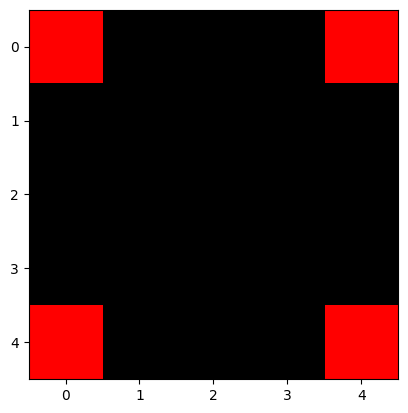

In [8]:
env.reset()
# Render the initial observation
img = env.render(mode='rgb_array')
plt.imshow(img)
plt.show()



In [20]:
episodes = 10
for episode in range(1, episodes+1):
    state = env.reset()
    done = False
    score = 0 
    
    while not done:
        env.render()
        action = env.action_space.sample()
        n_state, reward, done, info = env.step(action)

    print('Episode:{} Tiger_Score:{} Goat_Score{}'.format(episode, reward[0], reward[1]))

[[1 0 0 0 1]
 [0 0 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]
 [1 0 0 0 1]]
[[1 0 0 0 1]
 [0 0 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]
 [1 0 0 0 1]]
[[1 0 0 0 1]
 [0 0 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]
 [1 0 0 0 1]]
[[ 1  0  0  0  1]
 [ 0  0  0  0  0]
 [ 0  0  0  0  0]
 [ 0 -1  0  0  0]
 [ 1  0  0  0  1]]
[[ 1  0  0  0  1]
 [ 0  0  0  0  0]
 [ 0  0  0  0  0]
 [ 0 -1  0  0  0]
 [ 1  0  0  1  0]]
[[ 1  0  0  0  1]
 [ 0  0  0  0  0]
 [ 0  0  0  0  0]
 [ 1 -1  0  0  0]
 [ 0  0  0  1  0]]
[[ 1  0  0  0  1]
 [ 0  0  0  0  0]
 [ 0  0  0  0  0]
 [ 1 -1  0  0  0]
 [ 0  0  0  1  0]]
[[ 1  0  0  0  1]
 [ 0  0  0  0  0]
 [ 0  0  0  0  0]
 [ 1 -1  0  0  0]
 [ 0  0  0  1  0]]
[[ 1  0  0  0  1]
 [ 0  0  0  0  0]
 [ 0  0  0  0  0]
 [ 1 -1  0  0  0]
 [ 0  0  0  1  0]]
[[ 1  0  0  0  1]
 [ 0  0  0  0  0]
 [ 0  0  0  0  0]
 [ 1 -1  0  0  0]
 [ 0  0  0  1  0]]
[[ 1  0  0  0  1]
 [ 0  0  0  0  0]
 [ 0  0  0  0  0]
 [ 1 -1  0  0  0]
 [ 0  0  0  1  0]]
[[ 1  0  0  0  1]
 [ 0  0  0  0  0]
 [ 0  0  0  0  0]
 [ 1 -1  0  0  0]
 [

IndexError: index 5 is out of bounds for axis 1 with size 5